In [1]:
# 함수형 API - MNIST에 적용하기
# MINST 데이터셋 불러오기 및 전처리

from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np

# 텐서플로우 저장소에서 데이터를 다운로드 받습니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data(path = 'mnist.npz')

from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 얻기 위해 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, 
                                                  random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 상요하기 위한 전처리 과정입니다.
x_train = (x_train.reshape(-1, 28, 28, 1))/255
x_val = (x_val.reshape(-1, 28, 28, 1))/255
x_test = (x_test.reshape(-1, 28, 28, 1))/255

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
# ce_layer = tf.keras.layers.CategoriEncoding(num_tokens=np.unique(y_train).__len__(), ouput_mode-'one_hot')
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input

# 함수형 API는 Input()을 통해 입력값의 형태를 정의해주어야 합니다.
inputs = Input(shape = (28, 28, 1))
x = Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = Conv2D(32, (3, 3), activation = 'relu')(x)
x = MaxPooling2D(strides = 2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 위에서 정의한 층을 포함하고 있는 모델을 생성합니다.
model = Model(inputs = inputs, outputs = x)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    validation_data = (x_val, y_val),
                    epochs = 10)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - acc: 0.2688 - loss: 1.9674 - val_acc: 0.4328 - val_loss: 1.5254
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - acc: 0.4994 - loss: 1.4119 - val_acc: 0.6061 - val_loss: 1.2013
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - acc: 0.6208 - loss: 1.1528 - val_acc: 0.7024 - val_loss: 0.9777
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - acc: 0.7196 - loss: 0.9245 - val_acc: 0.7626 - val_loss: 0.8173
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - acc: 0.7732 - loss: 0.7721 - val_acc: 0.8085 - val_loss: 0.6647
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - acc: 0.8067 - loss: 0.6622 - val_acc: 0.8216 - val_loss: 0.5988
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.8268 - loss: 0.5837 - val_acc: 0.8358 - val_loss: 0.5562
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.8423 - loss: 0.5193 - val_acc: 0.8393 - val_loss: 0.5180
Epoch 9/10
1313/1313 ━━━━━

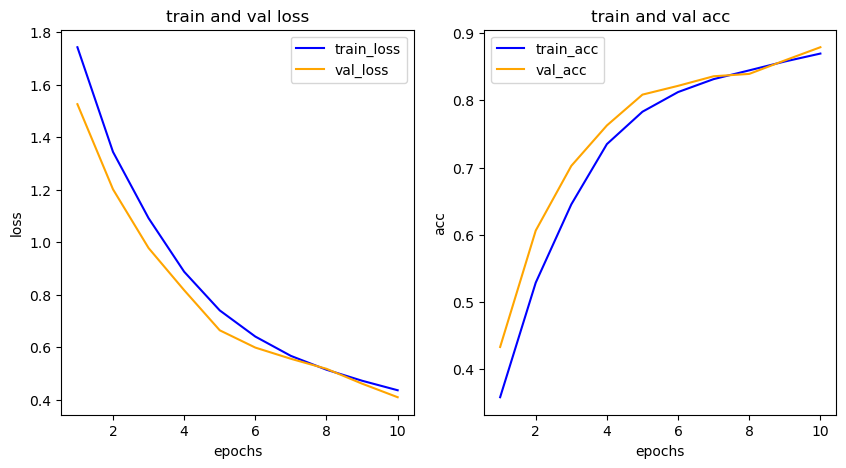

In [4]:
import matplotlib.pyplot as plt

his_dict = history.history

loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

# 훈련 침 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()
